### Objective:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 


In [1]:
### import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm
from xgboost import XGBClassifier
import warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

### 1. Import and Read Data

In [2]:
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv('Titanic_test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.shape

(891, 12)

In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_df.shape

(418, 11)

### 2. EDA

##### Data unerstanding

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


##### Data Visualization

<Axes: >

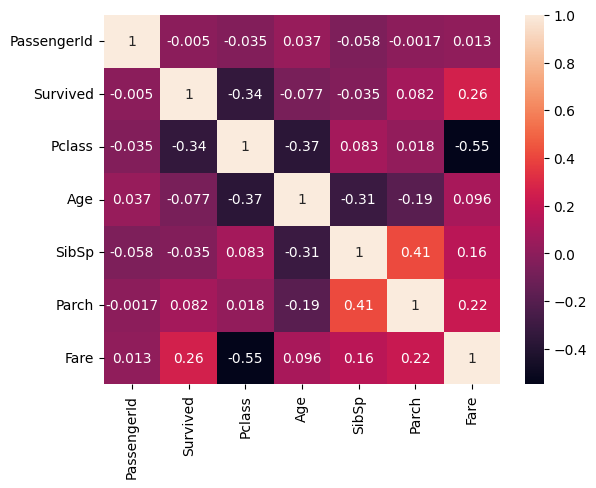

In [9]:
### plot heatmap to check co-relation
sns.heatmap(train_df.select_dtypes('number').corr(),annot=True)

<Axes: xlabel='Age', ylabel='Count'>

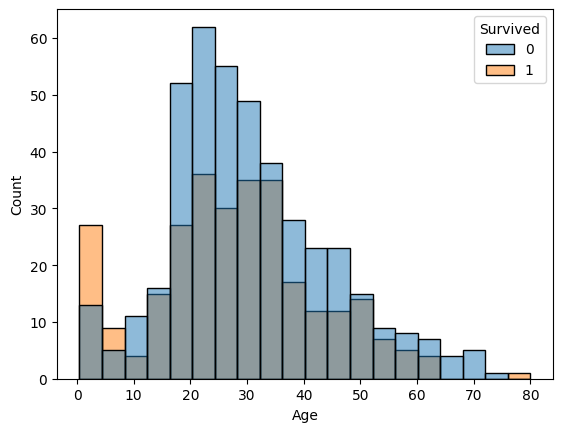

In [10]:
sns.histplot(data = train_df,x = 'Age',color='red',hue='Survived')

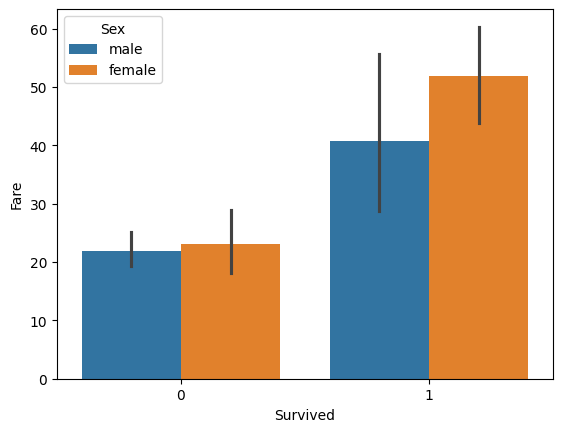

In [11]:
sns.barplot(train_df,x = 'Survived',y = 'Fare',hue = 'Sex')
plt.show()

### 3. Data Preprocessing

In [12]:
### check for missing values
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
### drop the columns which are less informative
train_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [14]:
train_df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C


In [15]:
### Missing value immputation for age column
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

In [16]:
train_df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [17]:
### Missing value immputation for Embarked column
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [18]:
train_df.isna().sum() 
##all the missing values has been replaced

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [19]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
dtype: object

In [20]:
train_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [21]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
### Encode categorical variable
cat_col = train_df[['Sex','Embarked']]

In [23]:
encoder = OneHotEncoder(sparse_output=False)
ohe = encoder.fit_transform(cat_col)

In [24]:
df = pd.DataFrame(ohe,columns=encoder.get_feature_names_out())

In [25]:
df

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.0,0.0,1.0
888,1.0,0.0,0.0,0.0,1.0
889,0.0,1.0,1.0,0.0,0.0


In [26]:
new_train_df = df.join(train_df)
new_train_df = new_train_df.drop(['Sex','Embarked'],axis=1)

### 4. Model Building

In [27]:
### Divide dataset into  Dependent and in  independent
x = new_train_df.drop(['Survived'],axis=1)
y = new_train_df['Survived']

In [28]:
## split data into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 12)

### LGBM

In [29]:
lbg_classifier = lightgbm.LGBMClassifier()

In [30]:
## Train model on LGBM Classifier
model = lbg_classifier.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 263, number of negative: 449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369382 -> initscore=-0.534869
[LightGBM] [Info] Start training from score -0.534869
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


  File "c:\Users\jayes\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\jayes\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jayes\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                

### Model Testing and Evaluation

In [31]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [32]:
print("Classification report of Light Gradient Boosting for Training Data:\n\n",classification_report(y_train,y_train_pred))

Classification report of Light Gradient Boosting for Training Data:

               precision    recall  f1-score   support

           0       0.95      0.98      0.96       449
           1       0.96      0.91      0.94       263

    accuracy                           0.95       712
   macro avg       0.96      0.95      0.95       712
weighted avg       0.95      0.95      0.95       712



In [33]:
print("Confusion Matrix of Light Gradient Boosting for Training Data:\n\n",confusion_matrix(y_train,y_train_pred))

Confusion Matrix of Light Gradient Boosting for Training Data:

 [[439  10]
 [ 23 240]]


In [34]:
print("Classification report of Light Gradient Boosting for Testing Data:\n\n",classification_report(y_test,y_test_pred))

Classification report of Light Gradient Boosting for Testing Data:

               precision    recall  f1-score   support

           0       0.77      0.87      0.82       100
           1       0.80      0.67      0.73        79

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [35]:
print("Confusion Matrix of Light Gradient Boosting for Training Data:\n\n",confusion_matrix(y_test,y_test_pred))

Confusion Matrix of Light Gradient Boosting for Training Data:

 [[87 13]
 [26 53]]


#### Hyperparameter Tuning

In [36]:
## Define Param Grid
param = {'n_estimators':[50, 100, 200],
         'learning_rate':[0.01, 0.1, 0.2],
         'num_leaves':[31, 50, 100]
}

In [37]:
gscv = GridSearchCV(estimator=model,param_grid=param,scoring='accuracy',cv=5,n_jobs=-1,verbose=1)
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 263, number of negative: 449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369382 -> initscore=-0.534869
[LightGBM] [Info] Start training from score -0.534869
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [31, 50, 100]},
             scoring='accuracy', verbose=1)

In [38]:
# Get the best parameters and best score
best_params = gscv.best_params_ 
best_score = gscv.best_score_ 
print("Best Parameters:", best_params) 
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50, 'num_leaves': 31}
Best Score: 0.8343445287107258


### XGBoost

In [39]:
xgb = XGBClassifier()

In [40]:
xgb.fit(x_train,y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)